## Import packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load training data

In [3]:
train_df = pd.read_csv('spaceship-titanic/train.csv')
test_df = pd.read_csv('spaceship-titanic/test.csv')

## Analysing data 

In [4]:
train_df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

### Column details 

PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.

CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

Destination - The planet the passenger will be debarking to.

Age - The age of the passenger.

VIP - Whether the passenger has paid for special VIP service during the voyage.

RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

Name - The first and last names of the passenger.

Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [5]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
train_df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


#### 1. How many distinct planets are there and how many people boarded from each

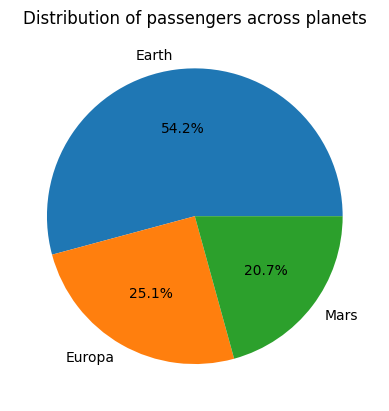

In [9]:
plt.pie(train_df["HomePlanet"].value_counts(), labels=train_df["HomePlanet"].value_counts().index, autopct='%1.1f%%')
plt.title('Distribution of passengers across planets')
plt.show()

<Axes: xlabel='HomePlanet', ylabel='count'>

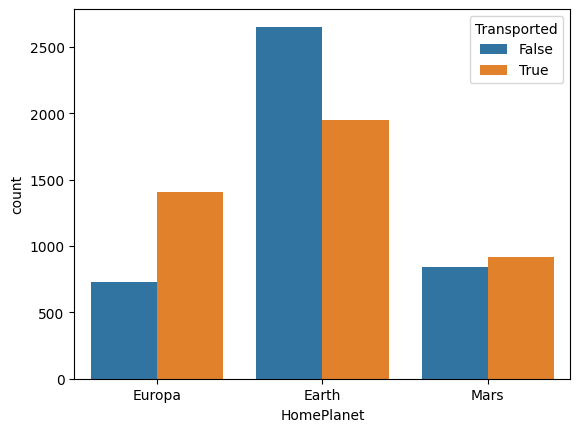

In [10]:
sns.countplot(data = train_df, x = "HomePlanet", hue = "Transported")

#### 2. Survival ratio of people in cryosleep

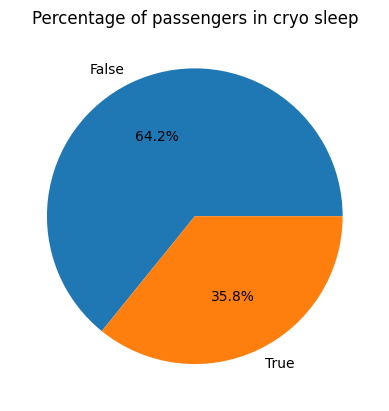

In [11]:
plt.pie(train_df["CryoSleep"].value_counts(), labels=train_df["CryoSleep"].value_counts().index, autopct='%1.1f%%')
plt.title('Percentage of passengers in cryo sleep')
plt.show()

<Axes: xlabel='CryoSleep', ylabel='count'>

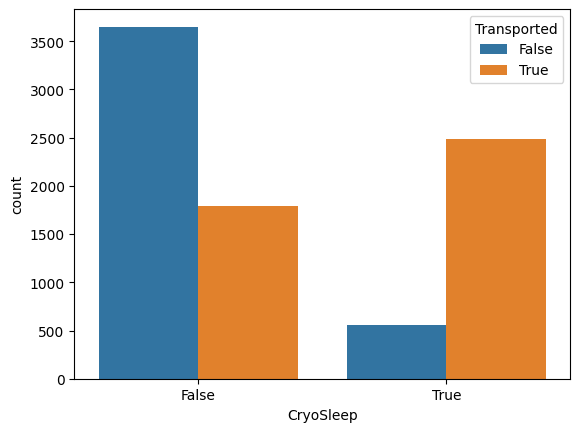

In [12]:
sns.countplot(data = train_df, x = "CryoSleep", hue = "Transported")

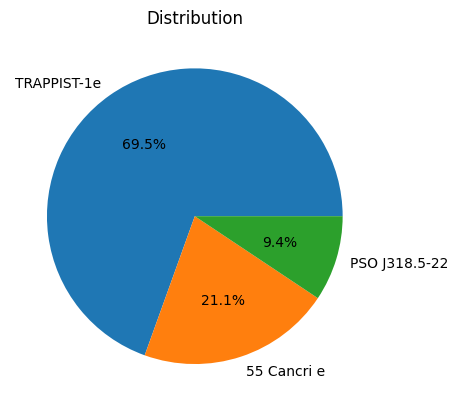

In [13]:
plt.pie(train_df["Destination"].value_counts(), labels=train_df["Destination"].value_counts().index, autopct='%1.1f%%')
plt.title('Distribution')
plt.show()

#### 3. How are passesngers travelling to different destinations affected

<Axes: xlabel='Destination', ylabel='count'>

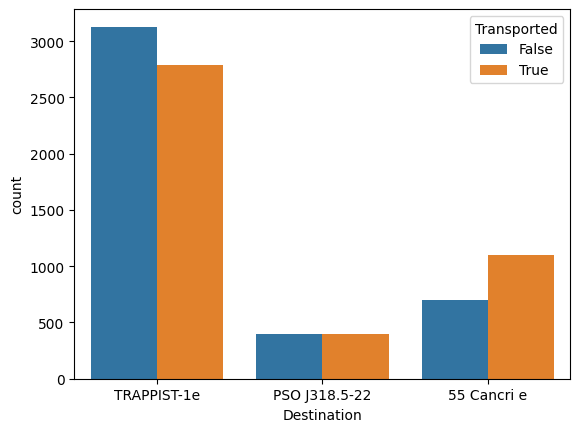

In [14]:
sns.countplot(data = train_df, x = "Destination", hue = "Transported")

#### 4. Does age have any relation on the transported status 

In [15]:
# Converting the age column to categorical for analysis
def age_categories(row):
    if row['Age'] <= 18:
        return "children"
    elif row['Age'] >= 19 and row['Age'] < 30:
        return "youngadults"    
    elif row['Age'] >= 30 and row['Age'] < 60:
        return "adults"
    else:
        return "old"

In [16]:
train_df['AgeCategories'] = train_df.apply (lambda row: age_categories(row), axis=1)

<Axes: xlabel='AgeCategories', ylabel='count'>

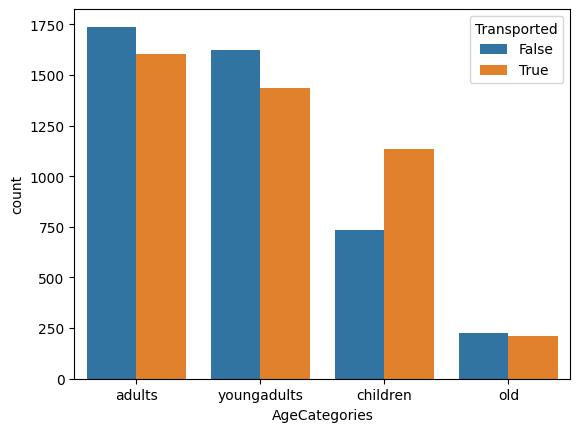

In [17]:
sns.countplot(data = train_df, x = "AgeCategories", hue = "Transported")

#### 5. Max earning luxury amenity

Text(0.5, 1.0, 'Total Earnings from luxury services')

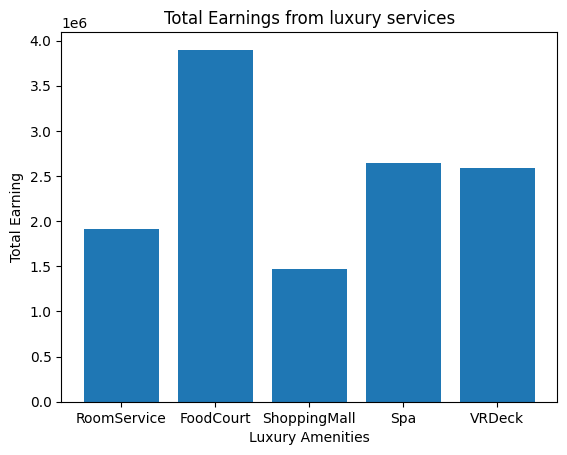

In [18]:
amenities = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
plt.bar(amenities, train_df[amenities].sum().values) 
plt.xlabel('Luxury Amenities')
plt.ylabel('Total Earning')
plt.title('Total Earnings from luxury services')

In [19]:
#### 6. VIP passengers criteria

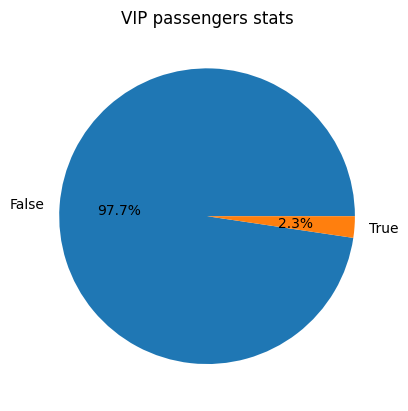

In [20]:
plt.pie(train_df["VIP"].value_counts(), labels=train_df["VIP"].value_counts().index, autopct='%1.1f%%')
plt.title('VIP passengers stats')
plt.show()

<Axes: xlabel='VIP', ylabel='count'>

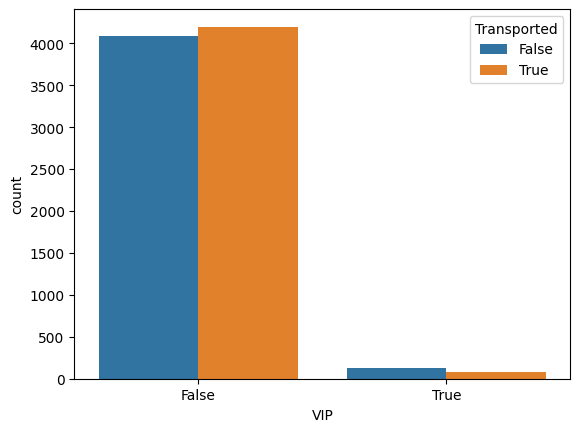

In [21]:
sns.countplot(data = train_df, x = "VIP", hue = "Transported")

# Feature Engineering
Cleaning the dataset and making it ready for training
* Features selection
* Imputation
* Categorical Encoding

In [22]:
# Composite column exists, dividing into multiple columns
train_df.Cabin.head()

0    B/0/P
1    F/0/S
2    A/0/S
3    A/0/S
4    F/1/S
Name: Cabin, dtype: object

In [23]:
train_df[["CabinDeck", "CabinNum", "CabinSide"]] = train_df.Cabin.apply(lambda cabin: pd.Series(cabin.split("/") if not pd.isnull(cabin) else [float("NaN"), float("NaN"), float("NaN")]))
test_df[["CabinDeck", "CabinNum", "CabinSide"]] = test_df.Cabin.apply(lambda cabin: pd.Series(cabin.split("/") if not pd.isnull(cabin) else [float("NaN"), float("NaN"), float("NaN")]))

In [24]:
# Dividing features into categorical for one hot encoding 
categorical_features = [col for col in train_df.columns if train_df[col].dtype == "object"]

# Removing columns of no importance for training
categorical_features.remove("Name")
categorical_features.remove("Cabin")
categorical_features.remove("CabinNum")
categorical_features

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Destination',
 'VIP',
 'AgeCategories',
 'CabinDeck',
 'CabinSide']

In [25]:
# Creating numerical columns list for imputation of null values
numerical_features = [col for col in train_df.columns if train_df[col].dtype == "int64" or train_df[col].dtype == "float64"]
numerical_features

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

 Splitting the data into features and target

In [26]:
X = train_df.drop(["Transported"], axis=1).copy()
y = train_df.Transported.copy()

In [27]:
# Remove PassengerId and other stale columns from training and testing data
X = X.drop(["PassengerId", "AgeCategories"], axis=1)
test_df = test_df.drop("PassengerId", axis=1)

In [28]:
categorical_features.remove("PassengerId")
categorical_features.remove("AgeCategories")

## Imputation
Imputation is a technique used for handling missing data. If you recall, most of our columns are missing between 2 to 2.5% of their values. If a column was missing upwards of 80% of our samples it would be a good idea to drop it entirely, but since we are missing so few values, we should figure out the best way to fill them in. 

### Imputing numerical values
A reminder on how much data is missing:

In [29]:
display(X[numerical_features].isnull().sum())
print()
display(test_df[numerical_features].isnull().sum())

Age             179
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
dtype: int64

Age              91
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
dtype: int64

In [30]:
for i in numerical_features:
    X[i] = X[i].fillna(X[i].median())
    # the null values are filled with median of the column
    test_df[i] = test_df[i].fillna(X[i].median())

Let's see how much is missing now (hopefully nothing):

In [31]:
display(X[numerical_features].isnull().sum())
print()
display(test_df[numerical_features].isnull().sum())

Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

### Imputing categorical values


In [32]:
display(X[categorical_features].isnull().sum())
print()
display(test_df[categorical_features].isnull().sum())

HomePlanet     201
CryoSleep      217
Destination    182
VIP            203
CabinDeck      199
CabinSide      199
dtype: int64

HomePlanet      87
CryoSleep       93
Destination     92
VIP             93
CabinDeck      100
CabinSide      100
dtype: int64

In [33]:
# .mode() returns a Series where the first element is what we want
for i in categorical_features:
    X[i] = X[i].fillna(X[i].mode().iloc[0]) 
    # Avoiding leakage
    test_df[i] = test_df[i].fillna(X[i].mode().iloc[0]) 

In [34]:
display(X[categorical_features].isnull().sum())
print()
display(test_df[categorical_features].isnull().sum())

HomePlanet     0
CryoSleep      0
Destination    0
VIP            0
CabinDeck      0
CabinSide      0
dtype: int64

HomePlanet     0
CryoSleep      0
Destination    0
VIP            0
CabinDeck      0
CabinSide      0
dtype: int64

## Categorical Encoding
The current data has many categorical columns which are strings and need to be encoded beefore training the mode

In [35]:
X = X[numerical_features + categorical_features]
test_df = test_df[numerical_features + categorical_features]

Checking for diff cat columns how many unique values are present

In [36]:
for i in categorical_features:
    print(f"Feature name: {i}. \nNo. of unique values: {X[i].nunique()} ({X[i].unique()})\n\n")

Feature name: HomePlanet. 
No. of unique values: 3 (['Europa' 'Earth' 'Mars'])


Feature name: CryoSleep. 
No. of unique values: 2 ([False  True])


Feature name: Destination. 
No. of unique values: 3 (['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e'])


Feature name: VIP. 
No. of unique values: 2 ([False  True])


Feature name: CabinDeck. 
No. of unique values: 8 (['B' 'F' 'A' 'G' 'E' 'D' 'C' 'T'])


Feature name: CabinSide. 
No. of unique values: 2 (['P' 'S'])




In [37]:
# Converting boolean true or false columns to 1 or 0
X[["CryoSleep", "VIP"]] = X[["CryoSleep", "VIP"]].astype(int)
test_df[["CryoSleep", "VIP"]] = test_df[["CryoSleep", "VIP"]].astype(int)

The remaining columns can be one hot encoded

Cabindeck looks like a ordinal feature as cabins have different classes of passengers, so leaving that column for ordinal encoding

In [38]:
ordinal_column_names = ["CabinDeck"]
one_hot_column_names = ["HomePlanet", "Destination", "CabinSide"]

### Ordinal Encoding

In [39]:
deck_mapping = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "T": 8}
X[ordinal_column_names] = X[ordinal_column_names].replace(deck_mapping)
test_df[ordinal_column_names] = test_df[ordinal_column_names].replace(deck_mapping)

### Categorical Encoding


In [40]:
X = pd.get_dummies(X).copy()
test_df = pd.get_dummies(test_df).copy()

Final data after encoding and imputation

In [42]:
X.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CryoSleep,VIP,CabinDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CabinSide_P,CabinSide_S
0,39.0,0.0,0.0,0.0,0.0,0.0,0,0,2,False,True,False,False,False,True,True,False
1,24.0,109.0,9.0,25.0,549.0,44.0,0,0,6,True,False,False,False,False,True,False,True
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0,1,1,False,True,False,False,False,True,False,True
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0,0,1,False,True,False,False,False,True,False,True
4,16.0,303.0,70.0,151.0,565.0,2.0,0,0,6,True,False,False,False,False,True,False,True
